In [ ]:
import sys
sys.path.append("..")
%load_ext autoreload
%autoreload 2

### Create JNK artifact from JNK data "before handling missing"

In [ ]:
import pandas as pd
import numpy as np
from fastcore.all import *
import wandb
from timecluster_extension.load import TSArtifact
import pickle
import matplotlib.pyplot as plt

#### Data Extraction

In [ ]:
base_path_jnk = Path.home()/'data/PACMEL-2019/JNK/' #*
data_file_name = 'jnk_before_handling_missing.pickle' #*

In [ ]:
# upload JNK data
f = open(f'{base_path_jnk}/{data_file_name}', 'rb')
bin_data = f.read()
jnk_file = pickle.loads(bin_data)
print(f'File uploaded successfully')

File uploaded successfully


In [ ]:
main_df = jnk_file[0]
main_df.index.freq = 's'
print(f'Num. variables: {len(main_df.columns)}')

Num. variables: 16


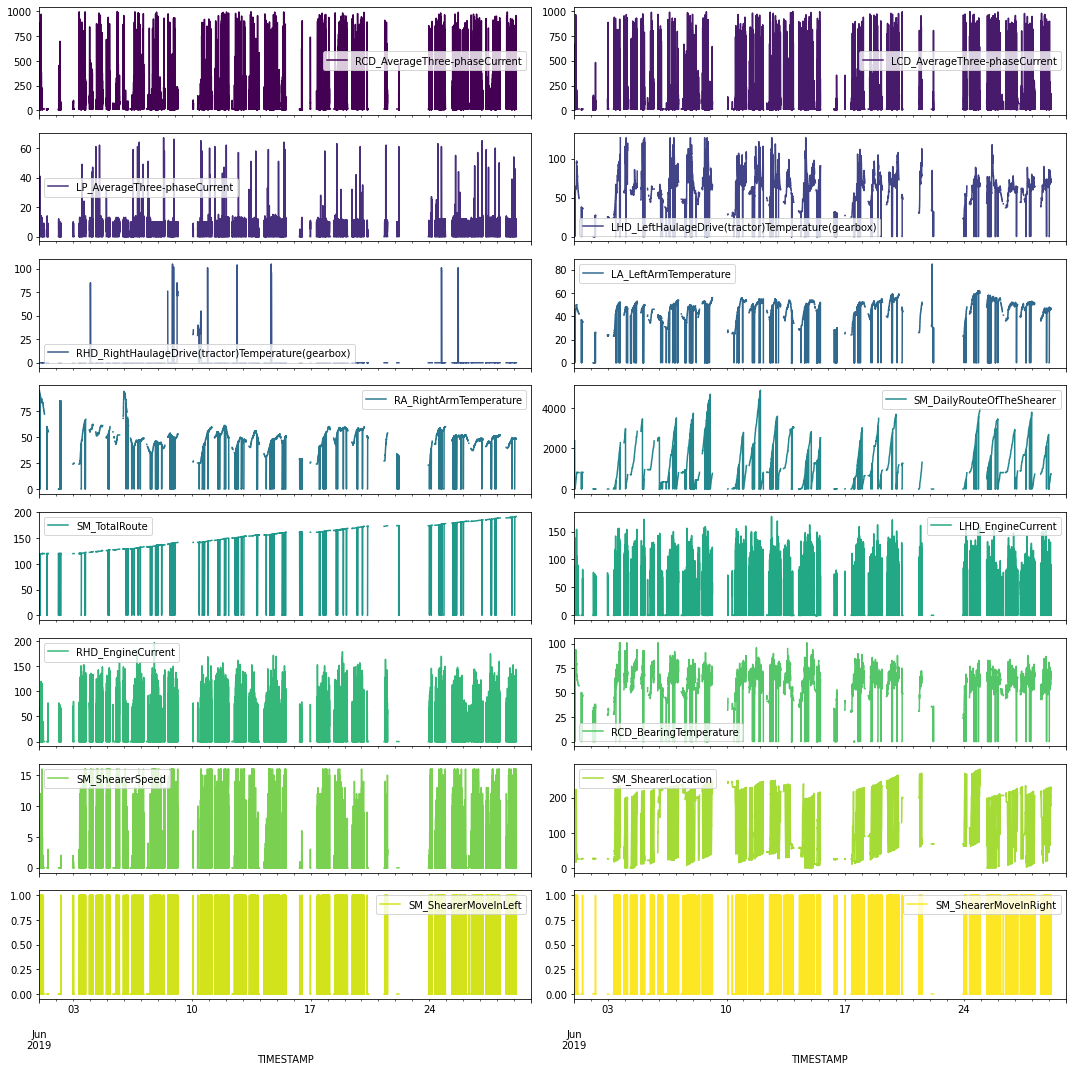

In [ ]:
ax = main_df.plot(subplots=True,
                          figsize=(15,15),
                          layout=(8,2), 
                          sharex=True,
                          colormap='viridis')
plt.tight_layout()

#### Data Transformation

In [ ]:
variables_file_name = 'mining-mapping.csv' #*

In [ ]:
# variables types
var_df = pd.read_csv(f'{base_path_jnk}/{variables_file_name}', index_col='Variable name')
jnk_var_type = {var : var_df.loc[var,'Type'] for var in main_df.columns}
jnk_var_type

{'RCD_AverageThree-phaseCurrent': 'double',
 'LCD_AverageThree-phaseCurrent': 'double',
 'LP_AverageThree-phaseCurrent': 'double',
 'LHD_LeftHaulageDrive(tractor)Temperature(gearbox)': 'double',
 'RHD_RightHaulageDrive(tractor)Temperature(gearbox)': 'double',
 'LA_LeftArmTemperature': 'double',
 'RA_RightArmTemperature': 'double',
 'SM_DailyRouteOfTheShearer': 'double',
 'SM_TotalRoute': 'double',
 'LHD_EngineCurrent': 'double',
 'RHD_EngineCurrent': 'double',
 'RCD_BearingTemperature': 'double',
 'SM_ShearerSpeed': 'double',
 'SM_ShearerLocation': 'double',
 'SM_ShearerMoveInLeft': 'bool',
 'SM_ShearerMoveInRight': 'bool'}

In [ ]:
# only variables of type double are stored
double_var_list = [var for var, var_type in jnk_var_type.items() if var_type=='double']
df = main_df[main_df.columns.intersection(double_var_list)]
print(f'Num. variables: {len(df.columns)}')

Num. variables: 14


In [ ]:
# techniques for handling Missing Data:

# --> interpolation
df = df.interpolate(limit_direction='both')

# --> the overall mean
# df = df.fillna(df.mean())

In [ ]:
# normalization --> normalization is now done when creating the artifact, to store the means and stds in the metadata
# df = normalize_columns(df)

In [ ]:
# resampling --> new frequency: 5 seconds
df = df.resample('5s').mean()

In [ ]:
df.head()

,RCD_AverageThree-phaseCurrent,LCD_AverageThree-phaseCurrent,LP_AverageThree-phaseCurrent,LHD_LeftHaulageDrive(tractor)Temperature(gearbox),RHD_RightHaulageDrive(tractor)Temperature(gearbox),LA_LeftArmTemperature,RA_RightArmTemperature,SM_DailyRouteOfTheShearer,SM_TotalRoute,LHD_EngineCurrent,RHD_EngineCurrent,RCD_BearingTemperature,SM_ShearerSpeed,SM_ShearerLocation
TIMESTAMP,,,,,,,,,,,,,,
2019-06-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0
2019-06-01 00:00:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0
2019-06-01 00:00:10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0
2019-06-01 00:00:15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0
2019-06-01 00:00:20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,179.0


In [ ]:
# training, validation and testing days
range_training = range(1, 16) #[15 days]
df_training = df.query('index.dt.day.isin(@range_training)')

range_validation = range(16, 21) #[5 days]
df_validation = df.query('index.dt.day.isin(@range_validation)')

range_testing = range(21, 30)  #[9 days]
df_testing = df.query('index.dt.day.isin(@range_testing)')

# Number of samples [1 day = 17280 samples every 5 seconds]
print(f'Training: {len(df_training)} / Validation: {len(df_validation)} / Testing: {len(df_testing)}')

Training: 259200 / Validation: 86400 / Testing: 155520


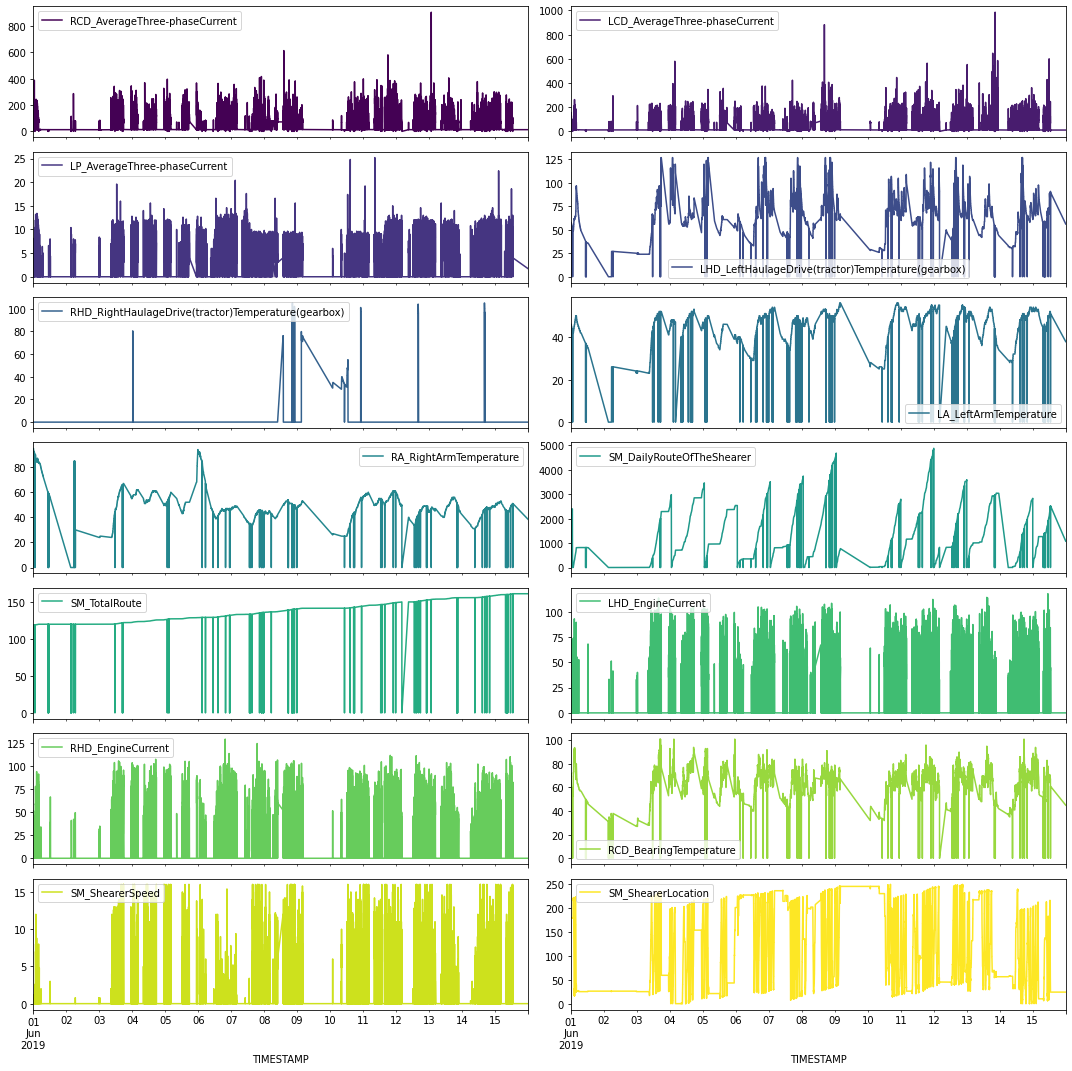

In [ ]:
ax = df_training.plot(subplots=True,
                      figsize=(15,15),
                      layout=(7,2), 
                      sharex=True,
                      colormap='viridis')
plt.tight_layout()

#### Data Loading

In [ ]:
wandb_artifacts_path = 'data/PACMEL-2019/wandb_artifacts' # When permissions are fixed, save artifacts in 'data/PACMEL-2019/wandb_artifacts'
artifact = TSArtifact.from_df(df_training, 'JNK', normalize=True, path= str(Path.home()/wandb_artifacts_path))

In [ ]:
# IMPORTANT! --> use wandb.init(..., mode='disabled', ...) to test W&B API
run = wandb.init(entity = 'pacmel', project='timecluster-extension', job_type='create_dataset', resume=True, mode='disabled')
run.log_artifact(artifact, aliases=['validation_5days_monday2friday'])
run.finish()

In [ ]:
artifact.metadata

{'TS': {'sd': '2019-06-01 00:00:00',
  'ed': '2019-06-15 23:59:55',
  'created': 'from-df',
  'freq': '<5 * Seconds>',
  'n_vars': 14,
  'n_samples': 259200,
  'has_missing_values': 'False',
  'vars': ['RCD_AverageThree-phaseCurrent',
   'LCD_AverageThree-phaseCurrent',
   'LP_AverageThree-phaseCurrent',
   'LHD_LeftHaulageDrive(tractor)Temperature(gearbox)',
   'RHD_RightHaulageDrive(tractor)Temperature(gearbox)',
   'LA_LeftArmTemperature',
   'RA_RightArmTemperature',
   'SM_DailyRouteOfTheShearer',
   'SM_TotalRoute',
   'LHD_EngineCurrent',
   'RHD_EngineCurrent',
   'RCD_BearingTemperature',
   'SM_ShearerSpeed',
   'SM_ShearerLocation'],
  'normalization': {'means': {'RCD_AverageThree-phaseCurrent': 39.716197145061734,
    'LCD_AverageThree-phaseCurrent': 38.54135300925926,
    'LP_AverageThree-phaseCurrent': 2.052238960796889,
    'LHD_LeftHaulageDrive(tractor)Temperature(gearbox)': 58.0804035297788,
    'RHD_RightHaulageDrive(tractor)Temperature(gearbox)': 5.362503858024692,
 